#Importing Libraries

In [309]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


# Loading Datasets

In [310]:
X_order=pd.read_csv("/content/drive/MyDrive/X_courier/Company X - Order Report.csv")
X_sku=pd.read_csv("/content/drive/MyDrive/X_courier/Company X - SKU Master.csv")
courier_rate=pd.read_csv('/content/drive/MyDrive/X_courier/Courier Company - Rates.xlsx - Sheet2.csv')
courier_invoice=pd.read_csv('/content/drive/MyDrive/X_courier/Courier Company - Invoice.xlsx - Sheet1.csv')
X_pincode=pd.read_csv('/content/drive/MyDrive/X_courier/Company X - Pincode Zones.xlsx - Sheet1.csv')

In [311]:
X_order.head()

ExternOrderNo            SKU  Order Qty
0     2001827036  8904223818706        1.0
1     2001827036  8904223819093        1.0
2     2001827036  8904223819109        1.0
3     2001827036  8904223818430        1.0
4     2001827036  8904223819277        1.0

In [312]:
X_sku.head()

SKU  Weight (g)
0  8904223815682         210
1  8904223815859         165
2  8904223815866         113
3  8904223815873          65
4  8904223816214         120

In [313]:
courier_rate.head()

Zone  Weight Slabs  Forward Fixed Charge  \
0    A          0.50                  29.5   
1    B          1.00                  33.0   
2    C          1.25                  40.1   
3    D          1.50                  45.4   
4    E          2.00                  56.6   

   Forward Additional Weight Slab Charge  RTO Fixed Charge  \
0                                   23.6              13.6   
1                                   28.3              20.5   
2                                   38.9              31.9   
3                                   44.8              41.3   
4                                   55.5              50.7   

   RTO Additional Weight Slab Charge  
0                               23.6  
1                               28.3  
2                               38.9  
3                               44.8  
4                               55.5

In [314]:
courier_invoice.head()

AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
0  1091117222124  2001806232            1.30             121003   
1  1091117222194  2001806273            1.00             121003   
2  1091117222931  2001806408            2.50             121003   
3  1091117223244  2001806458            1.00             121003   
4  1091117229345  2001807012            0.15             121003   

   Customer Pincode Zone Type of Shipment  Billing Amount (Rs.)  
0            507101    d  Forward charges                 135.0  
1            486886    d  Forward charges                  90.2  
2            532484    d  Forward charges                 224.6  
3            143001    b  Forward charges                  61.3  
4            515591    d  Forward charges                  45.4

In [315]:
X_pincode.head()

Warehouse Pincode  Customer Pincode Zone
0             121003            507101    d
1             121003            486886    d
2             121003            532484    d
3             121003            143001    b
4             121003            515591    d

# Checking whether zone given by x company and courier company matches or not


## Joining X_pincode and courier invoice

In [316]:
# rename Zone in pincode to zone_X

X_pincode.rename(columns={"Zone": "Zone_X"}, inplace=True)


In [317]:


joined_data = pd.merge(X_pincode, courier_invoice, on="Customer Pincode", how="inner")


In [318]:


zone_df = joined_data[['Customer Pincode', 'Zone_X', 'Zone']]


In [319]:
joined_data

Warehouse Pincode_x  Customer Pincode Zone_X       AWB Code    Order ID  \
0                 121003            507101      d  1091117222124  2001806232   
1                 121003            486886      d  1091117222194  2001806273   
2                 121003            532484      d  1091117222931  2001806408   
3                 121003            143001      b  1091117223244  2001806458   
4                 121003            515591      d  1091117229345  2001807012   
..                   ...               ...    ...            ...         ...   
169               121003            302020      b  1091117904860  2001811039   
170               121003            302020      b  1091121846136  2001811305   
171               121003            325207      b  1091118551656  2001812941   
172               121003            303702      b  1091117614452  2001809383   
173               121003            313301      b  1091120922803  2001820978   

     Charged Weight  Warehouse Pincode_y Zone         Type of Shipment  \
0              1.30               121003    d          Forward charges   
1              1.00               121003    d          Forward charges   
2              2.50               121003    d          Forward charges   
3              1.00               121003    b          Forward charges   
4              0.15               121003    d          Forward charges   
..              ...                  ...  ...                      ...   
169            0.68               121003    d          Forward charges   
170            0.50               121003    d          Forward charges   
171            0.73               121003    d          Forward charges   
172            0.50               121003    d  Forward and RTO charges   
173            0.50               121003    d          Forward charges   

     Billing Amount (Rs.)  
0                   135.0  
1                    90.2  
2                   224.6  
3                    61.3  
4                    45.4  
..                    ...  
169                  90.2  
170                  45.4  
171                  90.2  
172                  86.7  
173                  45.4  

[174 rows x 10 columns]

In [320]:
zone_df

Customer Pincode Zone_X Zone
0              507101      d    d
1              486886      d    d
2              532484      d    d
3              143001      b    b
4              515591      d    d
..                ...    ...  ...
169            302020      b    d
170            302020      b    d
171            325207      b    d
172            303702      b    d
173            313301      b    d

[174 rows x 3 columns]

In [321]:
zone_df['Zone_X'].value_counts()

Zone_X
b    127
d     38
e      9
Name: count, dtype: int64

In [322]:
zone_df['Zone'].value_counts()

Zone
d    142
b     30
e      2
Name: count, dtype: int64

In [323]:
#comparing zone column
np.mean(zone_df['Zone_X']==zone_df['Zone'])

0.3620689655172414

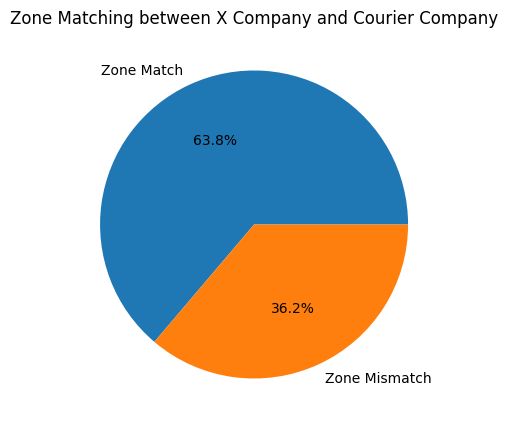

In [324]:


zone_df['Match'] = zone_df['Zone_X'] == zone_df['Zone']
match_counts = zone_df['Match'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(match_counts, labels=['Zone Match', 'Zone Mismatch'], autopct="%1.1f%%")
plt.title("Zone Matching between X Company and Courier Company")
plt.show()


only 36% of the pincode is labled as right zone

In [325]:


joined_data.rename(columns={"Zone": "Zone_courier"}, inplace=True)


In [326]:
courier_invoice['Warehouse Pincode'].nunique()

1

- no need of customer pincode as zones are given
- can drop warehouse pincode as it is zero variance column


In [327]:


joined_data.drop(['Customer Pincode', 'Warehouse Pincode_x', 'Warehouse Pincode_y'], axis=1, inplace=True)


Saving Joined_data for future use

#  Joining X_order , X_SKU to calculate total weight of each order

In [329]:


df= pd.merge(X_order, X_sku, on='SKU', how='inner')
df.head()


ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001821995  8904223818706        1.0         127
2     2001819252  8904223818706        1.0         127
3     2001816996  8904223818706        1.0         127
4     2001814580  8904223818706        1.0         127

In [330]:
df.shape

(401, 4)

# Calculating Total Weight of Each Order

In [331]:
df['total_weight_product']=df['Weight (g)']*df['Order Qty']

In [332]:


grouped_df = df.groupby('ExternOrderNo')['total_weight_product'].sum().reset_index()



In [333]:
grouped_df


ExternOrderNo  total_weight_product
0       2001806210                 220.0
1       2001806226                 480.0
2       2001806229                 500.0
3       2001806232                1302.0
4       2001806233                 245.0
..             ...                   ...
119     2001821995                 477.0
120     2001822466                1376.0
121     2001823564                 672.0
122     2001825261                1557.0
123     2001827036                2176.0

[124 rows x 2 columns]

# Adding total_weight column to the joined_data

In [334]:


grouped_df.rename(columns={"ExternOrderNo": "Order ID"}, inplace=True)


In [335]:


df = pd.merge(joined_data,grouped_df, on='Order ID')


In [336]:
df.head()

Zone_X       AWB Code    Order ID  Charged Weight Zone_courier  \
0      d  1091117222124  2001806232            1.30            d   
1      d  1091117222194  2001806273            1.00            d   
2      d  1091117222931  2001806408            2.50            d   
3      b  1091117223244  2001806458            1.00            b   
4      d  1091117229345  2001807012            0.15            d   

  Type of Shipment  Billing Amount (Rs.)  total_weight_product  
0  Forward charges                 135.0                1302.0  
1  Forward charges                  90.2                 615.0  
2  Forward charges                 224.6                2265.0  
3  Forward charges                  61.3                 700.0  
4  Forward charges                  45.4                 240.0

# Calculating the difference(mse) between actual weights and weight given by the courier company

In [337]:
print(f"mean squared error between actual weight and weight given by courier company is {mean_squared_error(df['Charged Weight'],round(df['total_weight_product']/1000,2))}")

mean squared error between actual weight and weight given by courier company is 0.2726873563218391


there is a error of 0.27 in weight calculation cant say how much weight is overcalculated and how much is undercalculated

In [338]:
np.mean(df['Charged Weight']-round(df['total_weight_product']/1000,2))

0.22471264367816096

on average 0.22 kg of weight is over calculated

## Joining courier rate and the main dataframe

here join is done according to the zone given by X company

### Renaming all the columns in courier_rate


In [339]:


courier_rate.rename(columns={
    'Zone': 'Zone_X',
    'Weight Slabs': 'Weight_Slabs_X',
    'Forward Fixed Charge': 'Forward_Fixed_Charge_X',
    'Forward Additional Weight Slab Charge': 'Forward_Additional_Weight_Slab_Charge_X',
    'RTO Fixed Charge': 'RTO_Fixed_Charge_X',
    'RTO Additional Weight Slab Charge': 'RTO_Additional_Weight_Slab_Charge_X'
}, inplace=True)



In [340]:
courier_rate.columns

Index(['Zone_X', 'Weight_Slabs_X', 'Forward_Fixed_Charge_X',
       'Forward_Additional_Weight_Slab_Charge_X', 'RTO_Fixed_Charge_X',
       'RTO_Additional_Weight_Slab_Charge_X'],
      dtype='object')

In [341]:
courier_rate["Zone_X"]=courier_rate['Zone_X'].apply(lambda x:x.lower())

In [342]:
#joining courier_rate to the main dataframe

df = pd.merge(df, courier_rate, on='Zone_X', how='inner')


In [343]:
df.columns

Index(['Zone_X', 'AWB Code', 'Order ID', 'Charged Weight', 'Zone_courier',
       'Type of Shipment', 'Billing Amount (Rs.)', 'total_weight_product',
       'Weight_Slabs_X', 'Forward_Fixed_Charge_X',
       'Forward_Additional_Weight_Slab_Charge_X', 'RTO_Fixed_Charge_X',
       'RTO_Additional_Weight_Slab_Charge_X'],
      dtype='object')

# Calculating the actual price for shipping

## Calculating number of slabs needed for each order

In [344]:
df['Number_of_slabs']=np.ceil(df['total_weight_product']/(df['Weight_Slabs_X']*1000))

In [345]:
df['Number_of_slabs'].unique()

array([1., 2., 3.])

In [346]:
df['Type of Shipment'].unique()

array(['Forward charges', 'Forward and RTO charges'], dtype=object)

In [347]:
df['Number_of_slabs'].value_counts()

Number_of_slabs
1.0    154
2.0     14
3.0      6
Name: count, dtype: int64

In [348]:
df.columns

Index(['Zone_X', 'AWB Code', 'Order ID', 'Charged Weight', 'Zone_courier',
       'Type of Shipment', 'Billing Amount (Rs.)', 'total_weight_product',
       'Weight_Slabs_X', 'Forward_Fixed_Charge_X',
       'Forward_Additional_Weight_Slab_Charge_X', 'RTO_Fixed_Charge_X',
       'RTO_Additional_Weight_Slab_Charge_X', 'Number_of_slabs'],
      dtype='object')

In [349]:
df['actual_bill']=np.where(df['Type of Shipment']=='Forward charges',df['Forward_Fixed_Charge_X']+(df['Number_of_slabs']-1)*df['Forward_Additional_Weight_Slab_Charge_X'],df['Forward_Fixed_Charge_X']+(df['Number_of_slabs']-1)*df['Forward_Additional_Weight_Slab_Charge_X']+df['RTO_Fixed_Charge_X']+(df['Number_of_slabs']-1)*df['RTO_Additional_Weight_Slab_Charge_X'])

In [350]:
df['actual_bill']

0       45.4
1       45.4
2       90.2
3       45.4
4       45.4
       ...  
169     56.6
170     56.6
171     56.6
172    112.1
173     56.6
Name: actual_bill, Length: 174, dtype: float64

In [351]:
np.mean(df['Billing Amount (Rs.)']-df['actual_bill'])

60.562068965517234

On an average they are overcalculating 60.56 rupees

# Plotting the graph of actual bill and courier bill

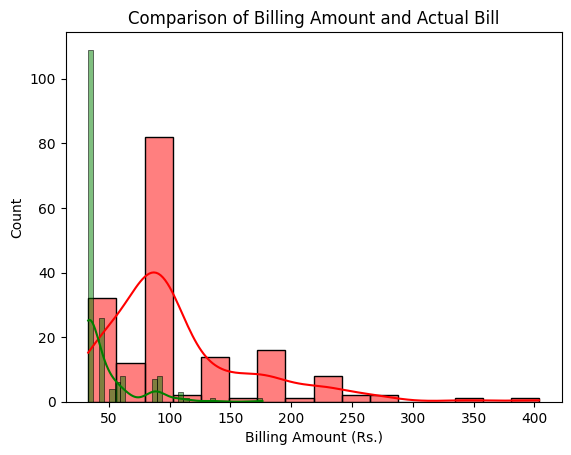

In [352]:


sns.histplot(data=df, x="Billing Amount (Rs.)", color="red",kde=True)
sns.histplot(data=df, x="actual_bill", color="green",kde=True)
plt.title("Comparison of Billing Amount and Actual Bill")
plt.show()


In [353]:
df['difference']=df['Billing Amount (Rs.)']-df['actual_bill']

In [354]:
df['difference']

0       89.6
1       44.8
2      134.4
3        0.0
4        0.0
       ...  
169    -23.6
170    -23.6
171    -23.6
172      5.8
173      4.7
Name: difference, Length: 174, dtype: float64

In [355]:
df.columns

Index(['Zone_X', 'AWB Code', 'Order ID', 'Charged Weight', 'Zone_courier',
       'Type of Shipment', 'Billing Amount (Rs.)', 'total_weight_product',
       'Weight_Slabs_X', 'Forward_Fixed_Charge_X',
       'Forward_Additional_Weight_Slab_Charge_X', 'RTO_Fixed_Charge_X',
       'RTO_Additional_Weight_Slab_Charge_X', 'Number_of_slabs', 'actual_bill',
       'difference'],
      dtype='object')

# Creating the final dataframe (Output 1)

## Joining Courier rate and df on Zone_courier for getting weight_slab as per courier company

In [356]:
# renaming columns in courier rate

courier_rate.columns = [col.replace('X', 'courier') for col in courier_rate.columns]
courier_rate.columns

Index(['Zone_courier', 'Weight_Slabs_courier', 'Forward_Fixed_Charge_courier',
       'Forward_Additional_Weight_Slab_Charge_courier',
       'RTO_Fixed_Charge_courier',
       'RTO_Additional_Weight_Slab_Charge_courier'],
      dtype='object')

In [357]:
courier_rate

Zone_courier  Weight_Slabs_courier  Forward_Fixed_Charge_courier  \
0            a                  0.50                          29.5   
1            b                  1.00                          33.0   
2            c                  1.25                          40.1   
3            d                  1.50                          45.4   
4            e                  2.00                          56.6   

   Forward_Additional_Weight_Slab_Charge_courier  RTO_Fixed_Charge_courier  \
0                                           23.6                      13.6   
1                                           28.3                      20.5   
2                                           38.9                      31.9   
3                                           44.8                      41.3   
4                                           55.5                      50.7   

   RTO_Additional_Weight_Slab_Charge_courier  
0                                       23.6  
1                                       28.3  
2                                       38.9  
3                                       44.8  
4                                       55.5

In [358]:
courier_rate.columns

Index(['Zone_courier', 'Weight_Slabs_courier', 'Forward_Fixed_Charge_courier',
       'Forward_Additional_Weight_Slab_Charge_courier',
       'RTO_Fixed_Charge_courier',
       'RTO_Additional_Weight_Slab_Charge_courier'],
      dtype='object')

In [359]:
#joining courier_rate and the main table and courier_rate to get weight as per courier company
df = pd.merge(df, courier_rate[['Zone_courier', 'Weight_Slabs_courier']], on='Zone_courier', how='inner')


In [360]:
df.columns

Index(['Zone_X', 'AWB Code', 'Order ID', 'Charged Weight', 'Zone_courier',
       'Type of Shipment', 'Billing Amount (Rs.)', 'total_weight_product',
       'Weight_Slabs_X', 'Forward_Fixed_Charge_X',
       'Forward_Additional_Weight_Slab_Charge_X', 'RTO_Fixed_Charge_X',
       'RTO_Additional_Weight_Slab_Charge_X', 'Number_of_slabs', 'actual_bill',
       'difference', 'Weight_Slabs_courier'],
      dtype='object')

In [361]:
df

Zone_X       AWB Code    Order ID  Charged Weight Zone_courier  \
0        d  1091117222124  2001806232            1.30            d   
1        d  1091117222194  2001806273            1.00            d   
2        d  1091117222931  2001806408            2.50            d   
3        d  1091117229345  2001807012            0.15            d   
4        d  1091117229555  2001806686            0.15            d   
..     ...            ...         ...             ...          ...   
169      e  1091120352712  2001819252            0.30            b   
170      e  1091122418320  2001827036            1.60            b   
171      e  1091117436652  2001808585            0.72            b   
172      e  1091117435661  2001808295            0.20            e   
173      e  1091120014461  2001818390            0.80            e   

            Type of Shipment  Billing Amount (Rs.)  total_weight_product  \
0            Forward charges                 135.0                1302.0   
1            Forward charges                  90.2                 615.0   
2            Forward charges                 224.6                2265.0   
3            Forward charges                  45.4                 240.0   
4            Forward charges                  45.4                 240.0   
..                       ...                   ...                   ...   
169          Forward charges                  33.0                 270.0   
170          Forward charges                 117.9                2176.0   
171          Forward charges                  61.3                 500.0   
172  Forward and RTO charges                 107.3                 245.0   
173  Forward and RTO charges                 213.5                 841.0   

     Weight_Slabs_X  Forward_Fixed_Charge_X  \
0               1.5                    45.4   
1               1.5                    45.4   
2               1.5                    45.4   
3               1.5                    45.4   
4               1.5                    45.4   
..              ...                     ...   
169             2.0                    56.6   
170             2.0                    56.6   
171             2.0                    56.6   
172             2.0                    56.6   
173             2.0                    56.6   

     Forward_Additional_Weight_Slab_Charge_X  RTO_Fixed_Charge_X  \
0                                       44.8                41.3   
1                                       44.8                41.3   
2                                       44.8                41.3   
3                                       44.8                41.3   
4                                       44.8                41.3   
..                                       ...                 ...   
169                                     55.5                50.7   
170                                     55.5                50.7   
171                                     55.5                50.7   
172                                     55.5                50.7   
173                                     55.5                50.7   

     RTO_Additional_Weight_Slab_Charge_X  Number_of_slabs  actual_bill  \
0                                   44.8              1.0         45.4   
1                                   44.8              1.0         45.4   
2                                   44.8              2.0         90.2   
3                                   44.8              1.0         45.4   
4                                   44.8              1.0         45.4   
..                                   ...              ...          ...   
169                                 55.5              1.0         56.6   
170                                 55.5              2.0        112.1   
171                                 55.5              1.0         56.6   
172                                 55.5              1.0        107.3   
173                                 55.5              

In [362]:
#Creating final output 1
Detailed_Output=pd.DataFrame()
Detailed_Output[['Order ID','AWB Code','Total Weight as per X(KG)','Weight Slab as per X(KG)','Total Weight as per Courier Company(KG)','Weight Slab Charged by Courier Company','Deliver Zone as per X','Delivery Zone Charged by the Courier Company','Expected Charge as per X(Rs.)','Charges Billed by the Courier Company','Difference Between Expected Charges and Billed Charges']]=df[['Order ID','AWB Code','total_weight_product','Weight_Slabs_X','Charged Weight','Weight_Slabs_courier','Zone_X','Zone_courier','actual_bill','Billing Amount (Rs.)','difference']]

In [363]:
Detailed_Output['Total Weight as per X(KG)']=round(Detailed_Output['Total Weight as per X(KG)']/1000,2)

In [364]:
Detailed_Output

Order ID       AWB Code  Total Weight as per X(KG)  \
0    2001806232  1091117222124                       1.30   
1    2001806273  1091117222194                       0.62   
2    2001806408  1091117222931                       2.26   
3    2001807012  1091117229345                       0.24   
4    2001806686  1091117229555                       0.24   
..          ...            ...                        ...   
169  2001819252  1091120352712                       0.27   
170  2001827036  1091122418320                       2.18   
171  2001808585  1091117436652                       0.50   
172  2001808295  1091117435661                       0.24   
173  2001818390  1091120014461                       0.84   

     Weight Slab as per X(KG)  Total Weight as per Courier Company(KG)  \
0                         1.5                                     1.30   
1                         1.5                                     1.00   
2                         1.5                                     2.50   
3                         1.5                                     0.15   
4                         1.5                                     0.15   
..                        ...                                      ...   
169                       2.0                                     0.30   
170                       2.0                                     1.60   
171                       2.0                                     0.72   
172                       2.0                                     0.20   
173                       2.0                                     0.80   

     Weight Slab Charged by Courier Company Deliver Zone as per X  \
0                                       1.5                     d   
1                                       1.5                     d   
2                                       1.5                     d   
3                                       1.5                     d   
4                                       1.5                     d   
..                                      ...                   ...   
169                                     1.0                     e   
170                                     1.0                     e   
171                                     1.0                     e   
172                                     2.0                     e   
173                                     2.0                     e   

    Delivery Zone Charged by the Courier Company  \
0                                              d   
1                                              d   
2                                              d   
3                                              d   
4                                              d   
..                                           ...   
169                                            b   
170                                            b   
171                                            b   
172                                            e   
173                                            e   

     Expected Charge as per X(Rs.)  Charges Billed by the Courier Company  \
0                             45.4                                  135.0   
1                             45.4                                   90.2   
2                             90.2                                  224.6   
3                             45.4                                   45.4   
4                             45.4                                   45.4   
..                             ...                                    ...   
169                           56.6                                   33.0   
170                          112.1                                  117.9   
171                           56.6                                   61.3   
172                          107.3                                  107.3   
173                          107.3                                  213.5   

     D

#Calculating the Sign of the difference

In [365]:
def calc_sign(x):
  if x>0:
    return 1
  elif x<0:
    return -1
  else:
    return 0

In [366]:
df['sign']=df['difference'].apply(calc_sign)

In [367]:
sign=df.groupby('sign').agg({'Billing Amount (Rs.)': 'sum'})

In [368]:
sign

Billing Amount (Rs.)
sign                      
-1                   206.3
 0                   354.3
 1                 17872.2

In [369]:
sign=sign['Billing Amount (Rs.)'].to_dict()

In [370]:
value_dict=df['sign'].value_counts().to_dict()

In [371]:
value_dict

{1: 162, 0: 8, -1: 4}

# Creating Output Table 2

In [372]:
output2={'':['Total Orders Where X has been Correctly Charged','Total Orders Where X has been OverCharged','Total Orders Where X has been UnderCharged'],'Count':[value_dict[0],value_dict[1],value_dict[-1]],'Amount Rs':[sign[0],sign[1],sign[-1]]}

In [373]:
output_summary=pd.DataFrame(output2)

In [374]:
output_summary

Count  Amount Rs
0  Total Orders Where X has been Correctly Charged      8      354.3
1        Total Orders Where X has been OverCharged    162    17872.2
2       Total Orders Where X has been UnderCharged      4      206.3

# Saving the Files

In [375]:

Detailed_Output=Detailed_Output.to_csv('Detailed_Output.csv', index=False)
output_summary=output_summary.to_csv('Summary_Output.csv', index=False)


# Analysizing the Output

## Plotting difference in pricing v/s correct zone

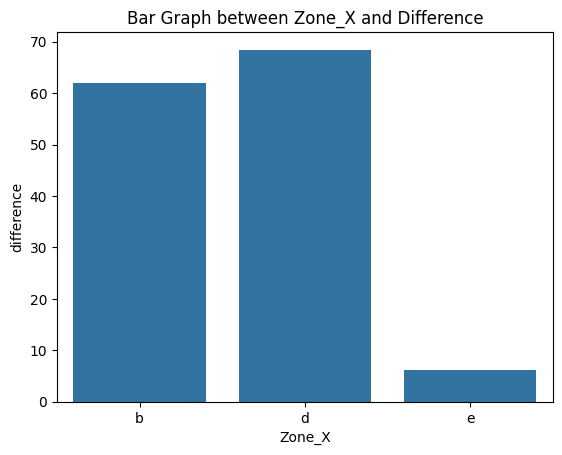

In [376]:


zone_x = df.groupby('Zone_X')['difference'].mean().reset_index()

sns.barplot(x='Zone_X', y='difference', data=zone_x)
plt.title('Bar Graph between Zone_X and Difference')
plt.show()


- zone_d and zone_b is the more over charged zones ,zone_e is less overcharged

<Figure size 2000x1000 with 0 Axes>

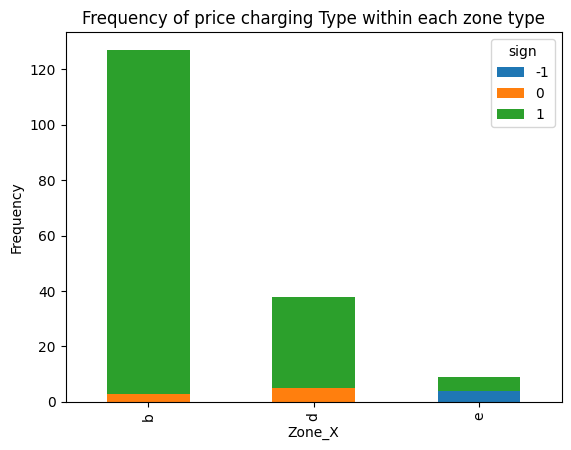

In [377]:
counts = df.groupby(['Zone_X', 'sign']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))

counts.plot(kind='bar',stacked=True)
plt.xlabel('Zone_X')
plt.ylabel('Frequency')
plt.title('Frequency of price charging Type within each zone type')
plt.legend(title='sign')
plt.show()

- Only zone_e has under charged orders
- comparatively zone_d has more proportion of correctly charged orders
- zone_d has more number of orders and 99% of the orders are over
  charged

## Plotting Zone as per X v/s Zone as per courier company

<Figure size 2000x1000 with 0 Axes>

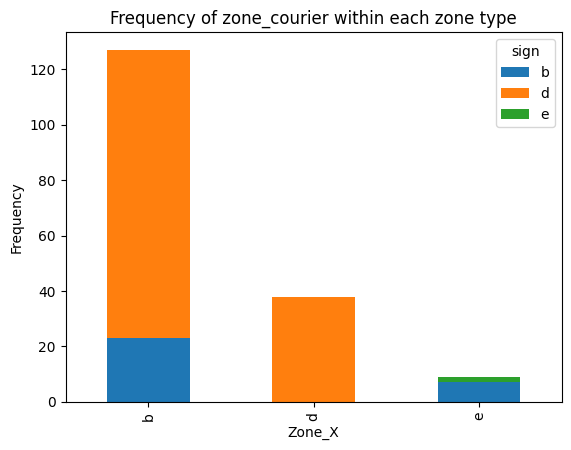

In [378]:
counts = df.groupby(['Zone_X', 'Zone_courier']).size().unstack(fill_value=0)

plt.figure(figsize=(20, 10))

counts.plot(kind='bar',stacked=True)
plt.xlabel('Zone_X')
plt.ylabel('Frequency')
plt.title('Frequency of zone_courier within each zone type')
plt.legend(title='sign')
plt.show()

- Most of the zone_b orders are misclassified as zone_d and zone_e
- zone_d shipping charge is greater than zone_b
- zone_b has the least shipping charge so courier company has misclassified it as zone_d and zone_e

